## 라이브러리 임포트
- 실습에 필요한 라이브러리 임포트

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기(학습데이터, 테스트 데이터)
- 데이터 분석 단계에서 생성한 농구 선수 포지션 예측하기의 학습 데이터 및 테스트 데이터를 로드 

In [4]:
train = pd.read_csv('data/csv/basketball_train.csv')
test = pd.read_csv('data/csv/basketball_test.csv')

## SVM 최적의 파라미터 찾기
- 1. C(cost, 비용) : 결정경계선의 마진을 결정하는 파라미터
- 2. gamma : 커널의 데이터 포인트의 표준편차를 결정하는 파라미터.

### sklearn에서 제공하는 GridSearchCV를 사용하면 손쉽게 최적의 c, gamma를 구할 수 있다. 

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [7]:
def svc_param_selection(X, y, nfolds) : 
    svm_parameters = [
        {
            'kernel' : ['rbf'],
            'gamma' : [0.00001,0.0001,0.001,0.01,0.1,1],
            'C' : [0.01, 0.1, 1, 10, 100, 1000]
        }
    ]    
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds) # nfolds = 교차 정보
    clf.fit(X, y)
    print(clf.best_params_)
    
    return clf

In [8]:
X_train = train[['3P','BLK']]
y_train = train[['Pos']]

# 최적의 파라미터를 sklearn의 GridSearchCV()를 통해 구한다. 
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### 시각화
- 최적의 파라미터일때의 결정경계선과 다른 파라민터들일 떄의 결정경계선을 비교.

In [9]:
# 시각화를 하기 위해, 최적의 C와 다른 C를 후보로 저장한다.

C_candidaties = []
C_candidaties.append(clf.best_params_['C'] * 0.01 )
C_candidaties.append(clf.best_params_['C'])
C_candidaties.append(clf.best_params_['C'] * 100)

# 시각화를 하기 위해, 최적의 gamma와 다른 gamma를 후보로 저장한다.

gamma_candidaties = []
gamma_candidaties.append(clf.best_params_['gamma'] * 0.01 )
gamma_candidaties.append(clf.best_params_['gamma'])
gamma_candidaties.append(clf.best_params_['gamma'] * 100)


In [10]:
X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

#포지션에 해당하는 문자열 'SG'와 'C'를 백터화한다.
position = []
for gt in Y :#문자의 값을 숫자값으로! 
    if gt == 'C' :
        position.append(0) 
    else :  
        position.append(1)

In [11]:
# 각각의 파라미털에 해당하는 SVM 모델을 만들어 classifiers에 저장한다.
classifiers = []
for C in C_candidaties : 
    for gamma in gamma_candidaties :
        clf = SVC(C=C, gamma = gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


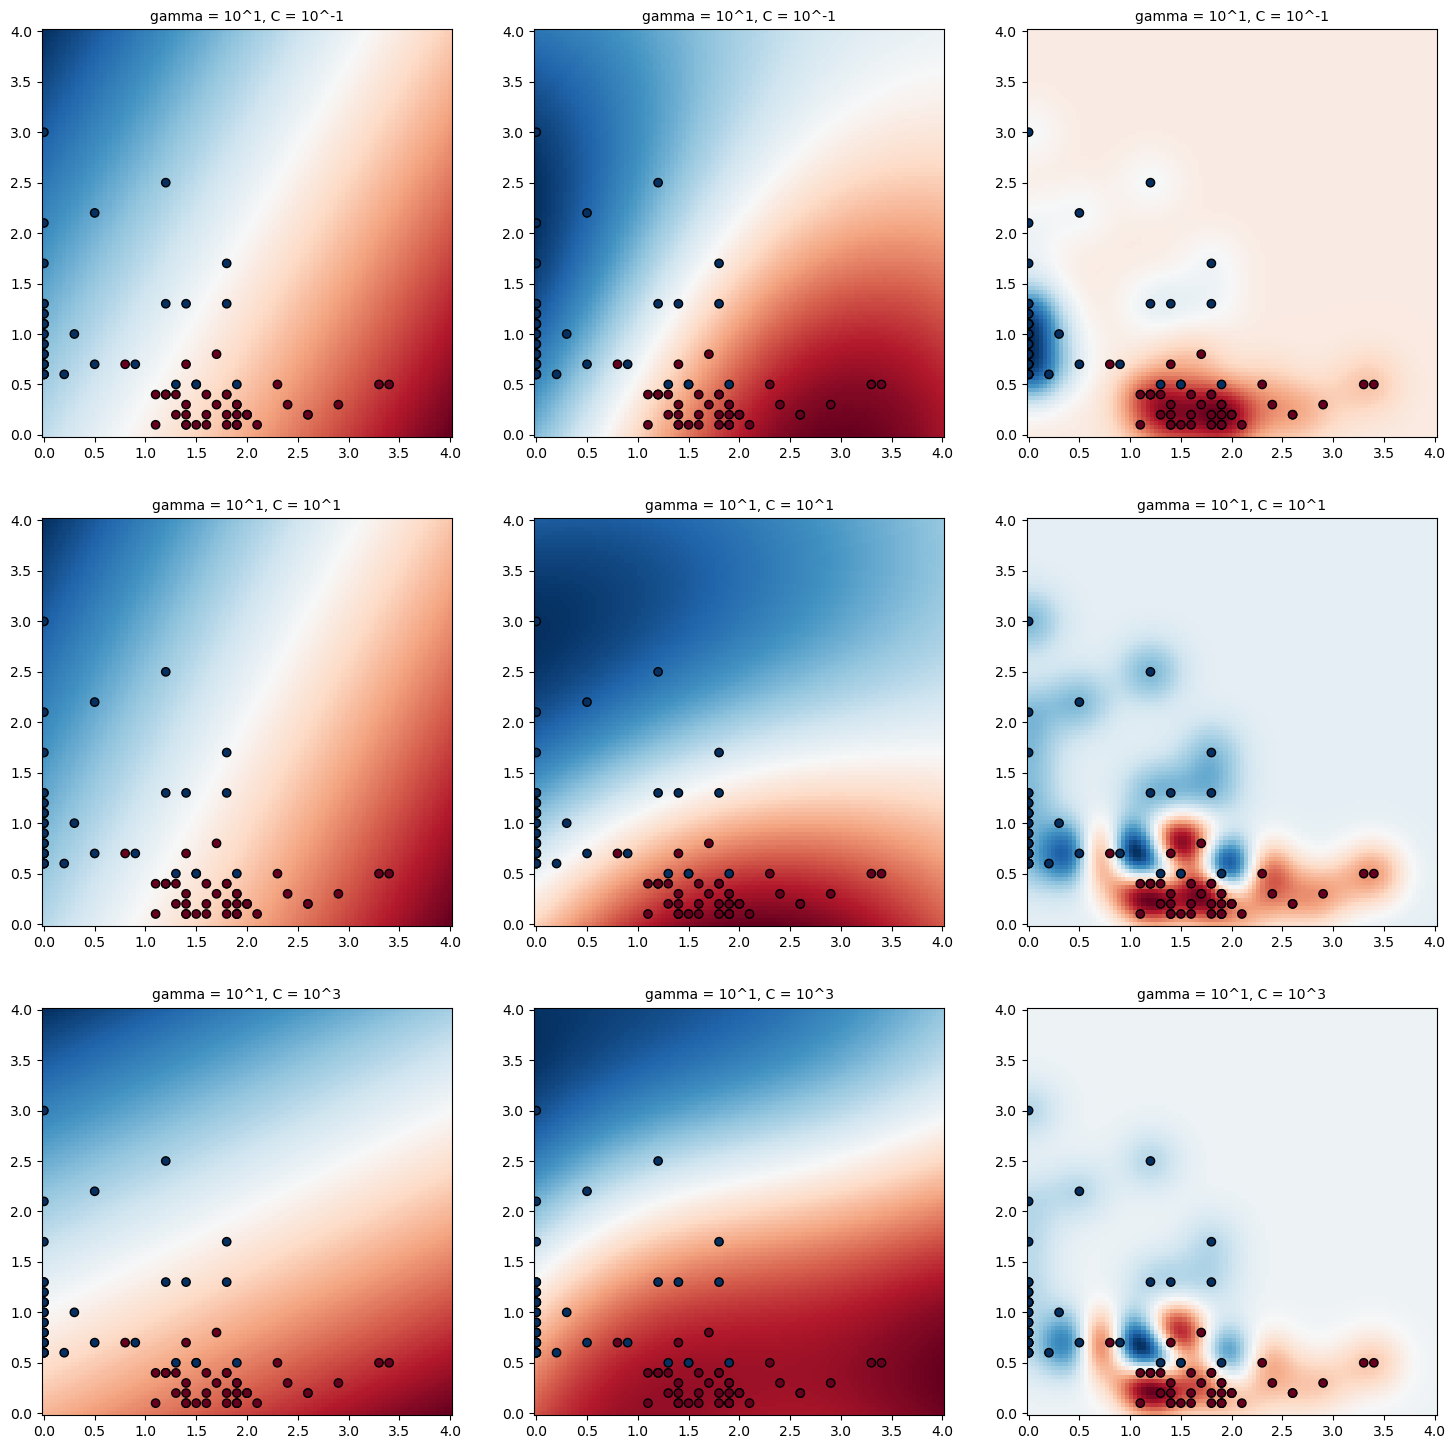

In [12]:
# 18, 18 사이즈의 차트를 구성 
plt.figure(figsize=(18,18),) #차트를 만들어주는 함수.
xx,yy = np.meshgrid(np.linspace(0,4,100), np.linspace(0,4,100)) # 2개의 값을 전달한다. 

# 각각의 모델들에 대한 결정 경계 함수를 적용하여 함께 시각화 
for(K, (C, gammma, clf)) in enumerate(classifiers) : # enumerate는 반환하는 값을 인덱스와 함께 반환한다.
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) # 차원을 변경해주는 함수
    
    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 함께 시각화. 
    plt.subplot(len(C_candidaties), len(gamma_candidaties), K + 1 ) # K + 1은 1부터 카운트하기 위함
    plt.title("gamma = 10^%d, C = 10^%d" % (np.log10(gamma),np.log10(C)), size='medium')
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'],X['BLK'],c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

In [13]:
# meshgrid 예시 
test_x, test_y = np.meshgrid([1,2,3],[1,2,3])
print(test_x)
print(test_y)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


## Test
- sklearn의 GridSearch로 얻어진 최적의 파라미터로 학습된 clf를 이용하여 테스트 진행

In [14]:
# Test에 사용된 특징을 지정
X_test = test[['3P','BLK']]

# 특징으로 예측할 값(농구선수 포지션)을 지정
y_test = test[['Pos']]

#최적의 파라미터로 완성된 SVM에 테스트 데이터를 주입하여, 실제값과 예특값을 얻는다. 
y_true, y_pred = y_test, clf.predict(X_test)

# classification_report 임포트
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))
# 중요 정보는 column에 표시(열)
# 정밀도 precision이 낮으면 불만이 많다. (N를 P으로 잘 못 예측한다.)
# 재현율 recall이 낮으면 치명적인 오류(P를 N으로 잘 못 예측한다.)

from sklearn.metrics import accuracy_score
print('accuracy : ' , str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        11
          SG       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

accuracy :  0.95


In [15]:
comparision = pd.DataFrame({'prediction' : y_pred, 'target': y_test.values.ravel()})
comparision

,prediction,target
0,C,C
1,C,C
2,C,C
3,SG,C
4,C,C
5,SG,SG
6,SG,SG
7,C,C
8,SG,SG
9,SG,SG
